# Step 1. 스티커/ 사진 구하기 or 만들기

**(1) flation에 들어가서 고양이 수염 이미지를 봤습니다. 너무 제 맘에 들지 않아서 저는 새로 만들었습니다. 고양이 수염 이미지는 cat_whiskers.png로 저장했습니다.**    

**(2) 핸드폰으로 1:1 비율의 셀카를 한 장 촬영했습니다. 제 얼굴 사진은 my_face.jpg로 저장해줬습니다.**

# Step 2. 사진 준비하기

**1. 우선 작업 디렉토리 구조를 세팅하고, Step 1에서 만들고 촬영한 이미지를 넣어줍니다. 저는 ```pr_imgages```파일을 만들어 여기에 이미지들을 넣어줬습니다.**

```
$ mkdir -p ~/aiffel/camera_sticker/pr_models
$ mkdir -p ~/aiffel/camera_sticker/pr_images
```

**2. 이미지 처리 관련 패키지인 opencv, cmake, dlib을 설치합니다.**

**3. 이미지 처리에 필요한 opencv와 이미지 출력에 필요한 matplotlib을 읽어옵니다. 잘 읽어왔는지 보기 위해 확인용으로 귀여운 고양이를 한번 출력해줍니다.**

In [863]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**4. 준비한 이미지를 opencv로 읽어오고, 이미지 크기를 변경합니다. 출력용 이미지는 따로 보관합니다.**

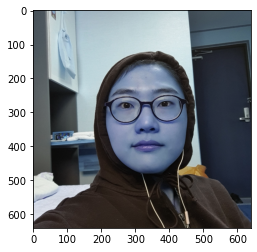

In [864]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/pr_images/my_face.jpg'
img_bgr = cv2.imread(my_image_path)   
img_bgr = cv2.resize(img_bgr, (640, 640)) # 640x640의 크기로 사이즈 조정
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

**5. 똘똘이 스머프인가요? 얼굴색이 이상하군요.    
opencv는 RGB 채널이 아닌 BGR 채널을 이용하기에 RGB 이미지로 바꿔줍니다.**

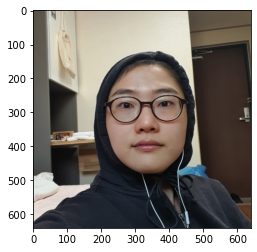

In [865]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Step 3. 얼굴 검출 & 랜드마크 검출 하기

**6. Objection detection 기술을 이용해 얼굴의 위치를 찾습니다.     
이를 위해 dlib의 face detector를 선언합니다.**

In [866]:
import dlib
detector_hog = dlib.get_frontal_face_detector() 
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**7. detector를 이용해 얼굴의 bounding box를 추출합니다.**

In [867]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) #  피라미드로 이미지를 크게 키워봄
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**8. 찾은 얼굴을 화면에 출력합니다.**

rectangles[[(200, 201) (468, 468)]]


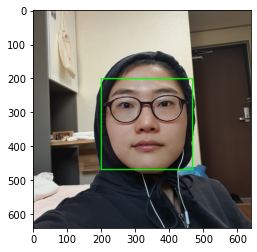

In [868]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**9. bounding box로 잘라낸 얼굴 이지에 Object keypoint estimation 알고리즘을 사용해 box 내부의 keypoint를 예측합니다. 이를 위해 dlib의 제공되는 모델을 다운받이 pr_models 디렉토리에 넣고 압축을 풀어줍니다.**

```
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/pr_models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./pr_models/shape_predictor_68_face_landmarks.dat.bz2
```

**10. 저장한 랜드마크 모델을 불러옵니다.**

In [869]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/pr_models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**11. ```landmark_predictor```는 RGB 이미지와 얼굴 bounding box 정보를 입력받아 ```dlib.full_object_detection```을 반환합니다.**

In [870]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


**12. 랜드마크를 사진에 출력합니다.**

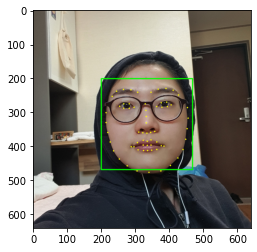

In [871]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 랜드마크를 노란색으로

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 4. 스티커 적용 위치 확인하기

13. 고양이 수염이 적용될 볼 위치를 랜드마크를 사용해 계산해야 합니다. 볼은 턱, 눈, 입, 코 사이에 있으니 2, 30, 48, 36 번 인덱스의 가운데에 적용이 될 수 있게 만들어 봅시다.

In [887]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    
    x = landmark[30][0]
    y = landmark[30][1]-dlib_rect.width()//2
    
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(332, 331)
(x,y) : (332,197)
(w,h) : (269,269)


In [888]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/pr_images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(269, 269, 3)


In [889]:
refined_x = x - w//2# left
refined_y = y - h # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (198,-72)


In [890]:
print (img_sticker.shape)

(269, 269, 3)


In [891]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (198,0)


In [892]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

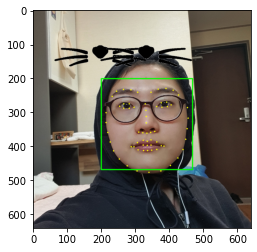

In [893]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# Step 5. 스티커 적용하기

# Step 6. 문제점 찾아보기

## (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해보세요.

## (2) 문제점이 무엇인지 최대한 자세하게 기록해보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

>- 얼굴 각도에 따라 스티커가 어떻게 변해야 할까요?

>- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?

>- 실행 속도가 중요할까요?

>- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?